In [31]:
import os
import random
import zipfile

from datasets import load_dataset
from os.path import isfile, join
from pathlib import Path

In [ ]:
zip_file_path = '/home/yassir/projects/image_semantic_segmentation/data/data.zip'
extract_directory = '/home/yassir/projects/image_semantic_segmentation/data/extracted'

# Create the destination folder if it doesn't exist
if not os.path.exists(extract_directory):
    os.makedirs(extract_directory)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_directory)

In [30]:
img_path = f"/home/yassir/projects/image_semantic_segmentation/data/extracted/img"

def gather_files(root_dir: str | os.PathLike):
    return sorted([f for f in os.listdir(root_dir) if isfile(join(root_dir, f))])

def build_datasets(files_root_dir, output_dir = None):
    imgs = gather_files(os.path.join(files_root_dir, "img"))
    masks = gather_files(os.path.join(files_root_dir, "mask"))
    names_imgs = [f.split('.')[0] for f in imgs]
    names_masks = [f.split('.')[0] for f in masks]
    
    ## Verification
    for img, mask in zip(names_imgs, names_masks):
        assert(img == mask)
    img_ds = load_dataset(path = os.path.join(files_root_dir, "img"), data_files = imgs)
    msks_ds = load_dataset(path = os.path.join(files_root_dir, "mask"), data_files = masks)
    img_ds['train'] = img_ds['train'].add_column('name', names_imgs)
    msks_ds['train']= msks_ds['train'].add_column('name', names_masks)
    return img_ds, msks_ds

img_ds, msks_ds = build_datasets(f"/home/yassir/projects/image_semantic_segmentation/data/extracted")
img_ds

DatasetDict({
    train: Dataset({
        features: ['image', 'name'],
        num_rows: 22558
    })
})

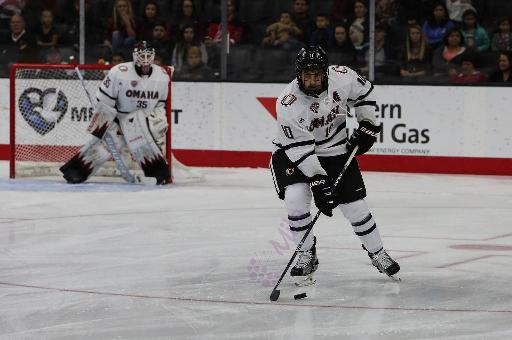

In [32]:
id = random.randint(0, 22558)
img_ds['train']['image'][id]

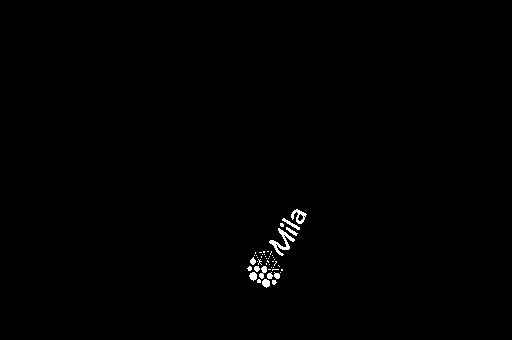

In [33]:
msks_ds['train']['image'][id]

In [16]:
msk_path = f"/home/yassir/projects/image_semantic_segmentation/data/extracted/mask"
msks = [f.split('.')[0] for f in os.listdir(img_path) if isfile(join(img_path, f))]
msks

['083e9cdaa02ead8f',
 'c9d765225928eedc',
 '5ad9c3ba4d696bdc',
 '3c5f0fdeb3c8d9c5',
 '750f79cdf5fb3abc',
 '7577baf1d9b41342',
 'a739a5aef80114e2',
 'b052b70b3de95081',
 'daf0dcfc8746369f',
 'b352d3aabdb54dae',
 '260d443a86c16327',
 'daa08d3e64f1de25',
 'db263e1be13f72bd',
 'f4c67a93a568b09b',
 '825c604893ba5aad',
 'c0573278e0cc7f18',
 'e7f9992d30339a62',
 '66716860339ad35e',
 'd65d7b30b4e56e97',
 'eb3e3738664a9ecb',
 'fab3909953643c33',
 '434889b1a135e9a3',
 '950c090a8201cbab',
 '36cdd53d8c484dcd',
 '7b93c864e700a148',
 'ba7244a6ee8ecfff',
 '6c6f13c83089f69c',
 'e33825b31d13a797',
 '6c6628a9797aab3c',
 '1ae0b000f81ebecb',
 '32d3961551e4ea94',
 'c85b79c35b1a257a',
 '14dd1b5cfeb74766',
 '7540690f9e818e91',
 'eaa7b397f462479b',
 '764fe7870966ee94',
 '2fea5345d999b7e2',
 '25d7773a66f2fb98',
 '51fb439a5bbfdb7b',
 'd33ac98ed0111f1a',
 '423ecb0cbaf3272d',
 'dd3b5ef4286a64bb',
 '90ded232f231e034',
 'fceac1164048b750',
 '92049671b9897a88',
 '71afde1f7e625b3f',
 '0973265aff36d01f',
 '3ed250376f1

In [ ]:
ds = load_dataset(f"/home/yassir/projects/image_semantic_segmentation/data/extracted/img")
ds = data_files

Generating train split: 22558 examples [00:00, 134664.45 examples/s]


DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 22558
    })
})

In [4]:
lbl = load_dataset(f"/home/yassir/projects/image_semantic_segmentation/data/extracted/mask")
lbl

Generating train split: 22558 examples [00:00, 207179.87 examples/s]


DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 22558
    })
})

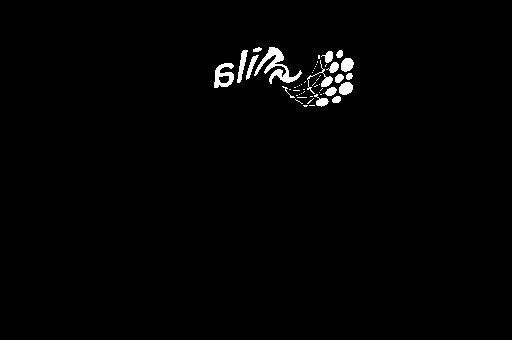

In [7]:
lbl['train']['image'][0]